# Customise dates on timeseries plots using matplotlib

## How to reformate date labels in matplotlib

matplotlib provides functionality to change the format of a date on a plot axis using the DateFormatter module, so that you can customise the look of your labels without having to rotate them.

Using the DataFormatter module from matplotlib, you can specify the format that you want to use for the date using the syntax: "%X %X" where each %X element represents a part of the date as follows:
- %Y - 4 digit year with upper case Y
- %y - 2 digit year with lower case y
- %m - month as a number with lower case m
- %b - month as abbreviated name with lower case b
- %d - day with a lower case d

You can also add a character between the "%X %X" to specify how the values are connected in hte label such as - or \.

E.g. using the syntax "%m-%d" to specify how the values are connected in the label such as - or \.

You will learn how to use DateFormatter to modify the look and frequency of the axis labels on your plots.

You will use the daily total precipitation (inches) data, sourced from NCEI COOP

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Download the data
data = et.data.get_data('colorado-flood')

In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with daily precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")

In [3]:
# Import data using datetime and no data value
precip_2003_2013_daily = pd.read_csv(file_path,
                                     parse_dates=['DATE'],
                                     index_col= ['DATE'],
                                     na_values=['999.99'])

Now, subset the data to time period June 1, 2005 - August 31, 2005 and plot the data without rotating the labels along the x-axis.

In [4]:
# Subset data to June-Aug 2005
precip_june_aug_2005 = precip_2003_2013_daily["2005-06-01":"2005-08-31"]

precip_june_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152
2005-06-02,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,153
2005-06-03,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,154
2005-06-04,0.7,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,155
2005-06-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,160


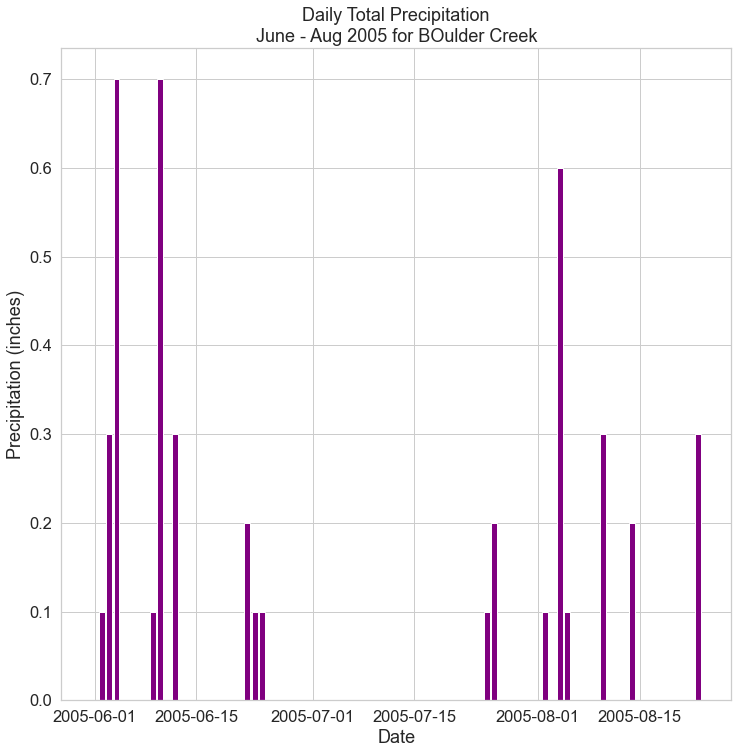

In [5]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
      precip_june_aug_2005["DAILY_PRECIP"],
      color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nJune - Aug 2005 for BOulder Creek")

plt.show()

NOtice that labels are not visually appealing with the year included. Given that the data have been subsetted to June to Aug within 2005, the labels can be shorten to remove the year, which is no longer needed.

## Use DateFormatter to reeformat data labels in matplotlib

To implement the custom date formatting, you can expand your plot code lines that define the format and then implement the format on the plot.

Define the date format you want to use as follows:

date_form = DateFormatter("%m-%d")

with the "%m-%d" specifying that you want the labels to appear like 05-01 for May 1st.

Then, all the format that you defined using the set_major_formatter() method on the x-axis of the plot:

ax.xaxis.set_major_formatter(date_form)

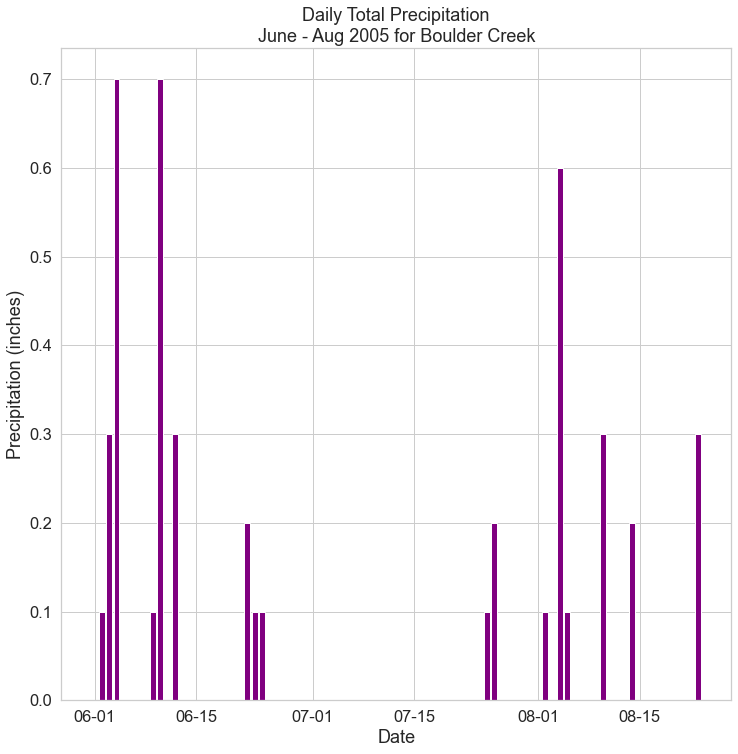

In [8]:
# Create figure anhd plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
      precip_june_aug_2005["DAILY_PRECIP"],
      color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

## Modify frequency of date label ticks

You could use tocks to indicate each new week using the code: xaxis.set_major_locator()

to control the location of the ticks.

Using a parameter to this function, you can specify that you want a large tick for each week with:
mdates.WeekdayLocater(interval=1)

The interval is an integer that represents the weekly frequncy of the ticks (e.g. a value of 2 to add a tock mark for every other week).

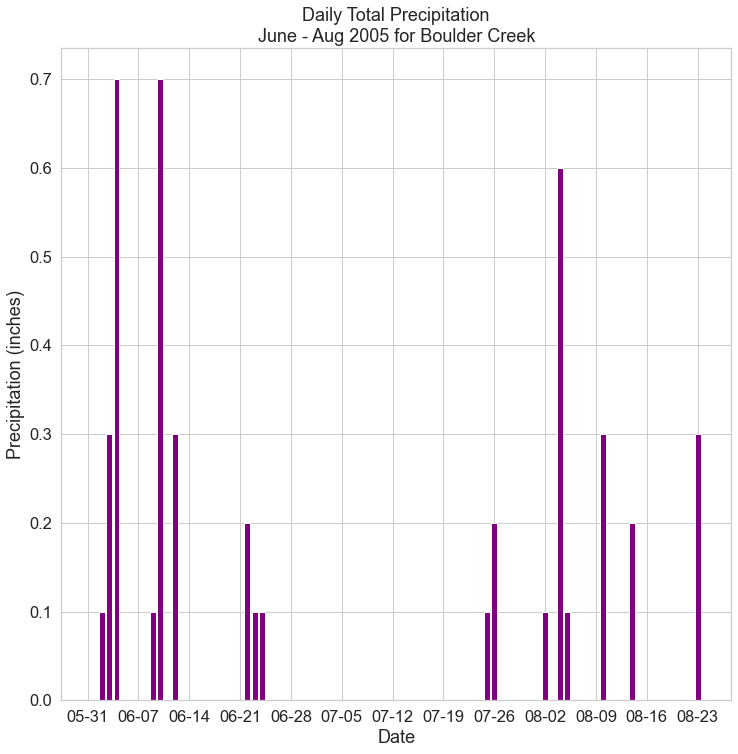

In [10]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
      precip_june_aug_2005["DAILY_PRECIP"],
      color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define t0he date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

Note that you can also specify the start and end of the labels by adding a parameter to ax.set for xlim such as;

xlim=["2005-06-01", "2005-08-31"]

to have the tick marks start on June 1st and finish on Aug 31st

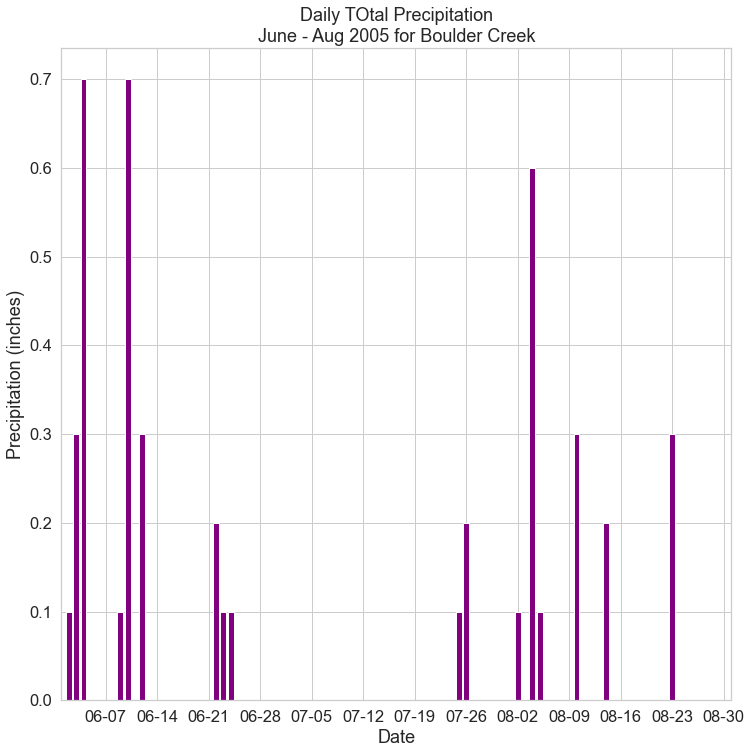

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
      precip_june_aug_2005["DAILY_PRECIP"],
      color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily TOtal Precipitation\nJune - Aug 2005 for Boulder Creek",
      xlim=["2005-06-01", "2005-08-31"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

The code above added labeled major ticks to the plot.

Note taht you can also add minor ticks to your plot using:

ax.xaxis.set_minor_locator()

Given we are using seaborn to customise the look of our plot, minor ticks are not rendered. If you wanted to add day ticks to a plot that did have minor ticks turned "on", you could use:

ax.xaxis.set_minor_locator(mdates.DayLocator())

with the parameter mdates.DayLocator() specifying that you want a tick for each day.